In [1]:
import numpy as np
from matplotlib import pyplot as plt
from random import randint
import random as rnd

import math
import time


In [2]:
class City:
    def __init__(self, x, y, index):
        self.x = x
        self.y = y
        self.name = 'C' + str(index)

    def __str__(self):
        return "{}| [{},{}]".format(self.name, self.x, self.y)


In [3]:
linkDistance = {}

def getDistance(city1, city2, link, rLink):
    distance = math.hypot(city1.x - city2.x, city1.y - city2.y)
    linkDistance[link] = distance
    linkDistance[rLink] = distance
    return distance

def lookupDistance(city1, city2):
    link = "{}->{}".format(city1.name,city2.name)
    rLink = "{}->{}".format(city2.name,city1.name)
    distance = -1
    if link in linkDistance or rLink in linkDistance:
        distance = linkDistance.get(link)
    else:
        distance = getDistance(city1, city2, link, rLink)
    return distance

def getTrueRouteDistance(route):
    index = 0
    distance = 0
    while index < len(route)-1:
        distance = distance + math.hypot(route[index].x - route[index+1].x, route[index].y - route[index+1].y)
        index = index + 1
    return distance

In [4]:
cachedSol = {}
cachedDist = {}

def getSubLink(startCity, subCities): 
    # sortedSubCities = sorted(subCities, key=lambda city: city.name)
    subLink =  startCity.name + " -> "
    for city in subCities:
        subLink = subLink + city.name + " -> "
    return subLink

def lookupSolution(cKey, lookupCache):
    cDist = -1
    cRoute = []
    if lookupCache and cKey in cachedDist:
        cDist = cachedDist[cKey]
        cRoute = cachedSol[cKey]
    return cDist, cRoute


In [5]:
def printSolution(lapse, solution, minDist, start):
    print("Route Distance ({}): Solved {} Cities with Best Distance [{}]".format(lapse,len(solution), minDist))
    routeString = ""
    for city in solution:
        routeString = routeString + city.name + " -> "
        plt.annotate(city.name, (city.x, city.y))

    routeString = routeString + start.name

    print(routeString)
    x = [city.x for city in solution]
    y = [city.y for city in solution]
    x.append(start.x)
    y.append(start.y)
    plt.plot(x, y)
    plt.show()


In [6]:
def solveDistance(startCity, subCityList, cout, lookupCache, printChange):
    routeDistance = -1
    localMinDistance = -1
    if len(subCityList) == 1:
        localRoute = [startCity]
        destCity = list(subCityList)[0]
        localRoute.append(destCity)
        localMinDistance = lookupDistance(startCity, destCity)
    else:
        for sCity in subCityList:
            startRouteDistance = lookupDistance(startCity, sCity)
            subCity = subCityList.copy() 
            subCity.remove(sCity)
            subRoute = []
            subRouteDistance = -1
            subLink = getSubLink(sCity, subCity)
            subRouteDistance, subRoute = lookupSolution(subLink, lookupCache)
            if subRouteDistance < 0:
                subRouteDistance, subRoute = solveDistance(sCity, subCity, cout, lookupCache, printChange)
                cachedSol[subLink] = subRoute
                cachedDist[subLink] = subRouteDistance

            subRouteDistance = subRouteDistance + startRouteDistance
            if localMinDistance > subRouteDistance or localMinDistance < 0:
                localRoute = [startCity]
                localMinDistance = subRouteDistance
                for c in subRoute:
                    localRoute.append(c)
                count = len(localRoute)
                if printChange and count == cout:
                    print("Cities {} -> {} | Min Route[Changed]: {}".format(startCity, count, localMinDistance))
    routeDistance = localMinDistance
    return routeDistance, localRoute


In [7]:
def getCitySet(cityCount):
    index=1
    citySet = set()
    while len(citySet) < cityCount:
        x, y = randint(5, 500 ), randint(5, 500)
        citySet.add(City(x, y, index))
        index=index+1
    citySet = sorted(citySet, key=lambda city: city.name)
    return citySet

### Solve Problem N number of times, each time Scramble CityList to see if results get better

In [8]:
def solveMultipleTimes(citySet, printChange):
    bestDistance = -1
    bestRoute = []
    sPoint = citySet[0]
    cityCount = len(citySet)
    retryCount = 0
    
    # Cleanup Dynamic Results Cachede
    cachedSol = {}
    cachedDist = {}
    linkDistance = {}
    startIterative = time.time()

    while retryCount < cityCount*3/4:
        retryCount = retryCount + 1
        lookupCache = True
        startPoint = citySet[retryCount]
        sCityList = citySet.copy() 
        sCityList.remove(startPoint)
        rnd.shuffle(sCityList)

        # # Cleanup Dynamic Results Cachede
        # cachedSol = {}
        # cachedDist = {}
        # linkDistance = {}


        start = time.time()
        routeDistance, route = solveDistance(startPoint, sCityList, len(citySet), lookupCache, printChange)
        end = time.time()
        if bestDistance > routeDistance or bestDistance < 0:
            bestRoute = route
            bestDistance = routeDistance
            printSolution(end-start, bestRoute, bestDistance, startPoint)
            sPoint = startPoint
    endIterative = time.time()
    print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
    print("Finished Multiple Solutions ({}) {}".format(endIterative-startIterative, retryCount))
    print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
    bestDistance = getTrueRouteDistance(bestRoute)
    printSolution(endIterative-startIterative, bestRoute, bestDistance, sPoint)
    print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
    print("Finished Multiple Solutions ({}) {}".format(endIterative-startIterative, retryCount))
    print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")

### Mostly without randomly scrabling the cityList, we wont get Results properly.

Cities C1| [186,151] -> 16 | Min Route[Changed]: 1783.8711187536946
Cities C1| [186,151] -> 16 | Min Route[Changed]: 1684.1114084680146
Cities C1| [186,151] -> 16 | Min Route[Changed]: 1661.052408990304
Route Distance (9.764155149459839): Solved 16 Cities with Best Distance [1661.052408990304]
C1 -> C8 -> C2 -> C13 -> C3 -> C6 -> C4 -> C9 -> C7 -> C12 -> C5 -> C16 -> C11 -> C14 -> C10 -> C15 -> C1


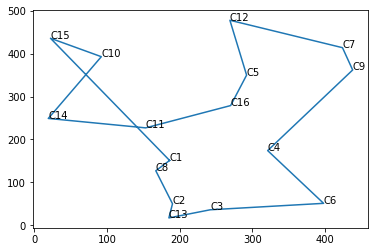

In [9]:
citySet = getCitySet(16)
cachedSol = {}
cachedDist = {}
linkDistance = {}
lookupCache = True
printChange = True

c1 = citySet[0]
sCityList = citySet.copy() 
sCityList.remove(c1)
start = time.time()
routeDistance, route = solveDistance(c1, sCityList, len(citySet), lookupCache, printChange)
end = time.time()
printSolution(end-start, route, routeDistance, c1)

Route Distance (9.407489776611328): Solved 16 Cities with Best Distance [1536.746525823774]
C10 -> C15 -> C14 -> C11 -> C1 -> C8 -> C2 -> C13 -> C3 -> C6 -> C4 -> C16 -> C5 -> C12 -> C7 -> C9 -> C10


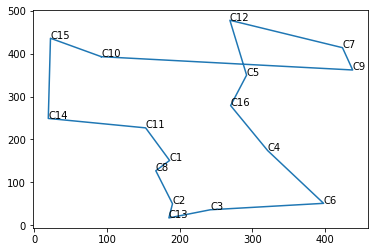

Route Distance (8.447615623474121): Solved 16 Cities with Best Distance [1527.6113790244553]
C12 -> C7 -> C9 -> C5 -> C16 -> C4 -> C6 -> C3 -> C13 -> C2 -> C8 -> C1 -> C11 -> C14 -> C10 -> C15 -> C12


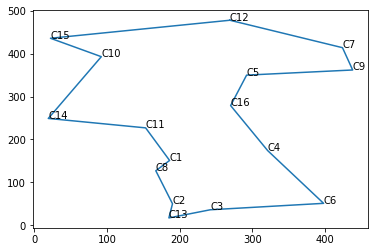

Route Distance (8.47271203994751): Solved 16 Cities with Best Distance [1511.169048794927]
C15 -> C10 -> C14 -> C11 -> C1 -> C8 -> C2 -> C13 -> C3 -> C6 -> C4 -> C16 -> C5 -> C12 -> C7 -> C9 -> C15


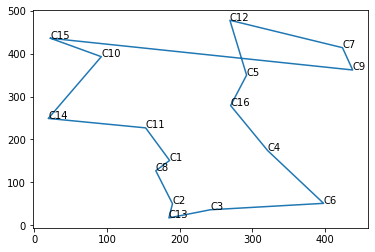

Finished Multiple Solutions {} 12
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Route Distance (105.45542860031128): Solved 16 Cities with Best Distance [1511.1690487949272]
C15 -> C10 -> C14 -> C11 -> C1 -> C8 -> C2 -> C13 -> C3 -> C6 -> C4 -> C16 -> C5 -> C12 -> C7 -> C9 -> C15


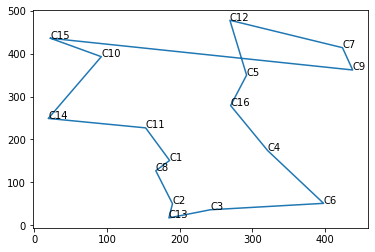

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [10]:
# citySet = getCitySet(16)
printChange = False
solveMultipleTimes(citySet, printChange)